# DATA EXPLORATION FOR Sprocket  Central Pty Lt

## DATA QUALITY ASSESMENT
> Assessment of data quality and completeness in preparation for analysis

> Here is the background information on your task
Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

- Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

> Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

>>__The client provided KPMG with 3 datasets:__

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months
- You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

### Tasks

>> Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

In [1]:
import pandas as pd
import numpy as np
# To Load the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
data= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=None)

In [3]:

    
# Prints all the sheets name in an ordered dictionary
print(data.keys())

dict_keys(['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])


In [4]:
Title_Sheet= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Title Sheet")
Transactions=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions")
NewCustomerList=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList")
CustomerDemographic=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")
CustomerAddress=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress")

In [5]:
Transactions.columns =Transactions.iloc[0]
Transactions = Transactions[1:]
NewCustomerList.columns =NewCustomerList.iloc[0]
NewCustomerList = NewCustomerList[1:]
CustomerDemographic.columns =CustomerDemographic.iloc[0]
CustomerDemographic =CustomerDemographic[1:]
CustomerAddress.columns =CustomerAddress.iloc[0]
CustomerAddress =CustomerAddress[1:]


In [6]:
# UNIQUESS OF THE CUSTOMERS RECORD

In [7]:
Transactions["customer_id"].nunique(),CustomerDemographic["customer_id"].nunique(),CustomerAddress["customer_id"].nunique()

(3494, 4000, 3999)

In [8]:
# MISSING RATE

In [9]:
100-Transactions.isna().sum().sum()/Transactions.size*100, 100-CustomerDemographic.isnull().sum().sum()/CustomerDemographic.size*100,CustomerAddress.isnull().sum().sum()/CustomerAddress.size

(99.40692307692308, 96.60961538461538, 0.0)

> ![image-2.png](attachment:image-2.png)


### Identification of data types:

> 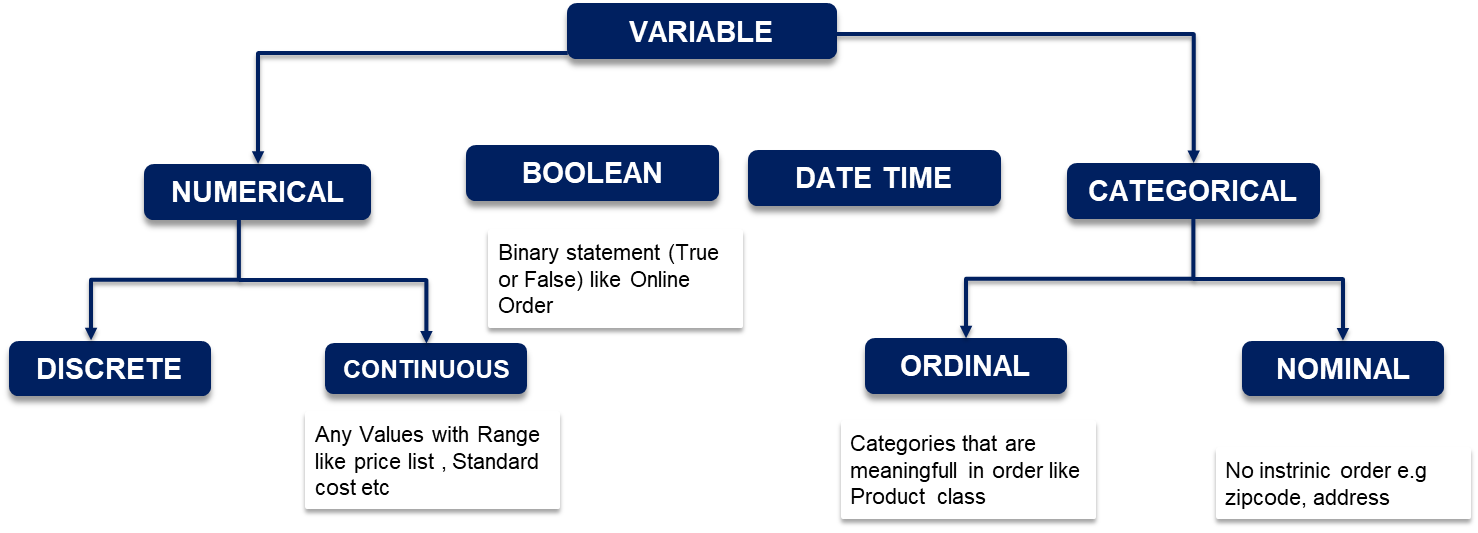


### Client Report

Dear Client,
Thank you for sharing the three datasets from Sprocket Central Pty Ltd with us. The table below 
illustrates the summary statistics from the datasets we received. Kindly inform us if the figures do not 
match your understanding.
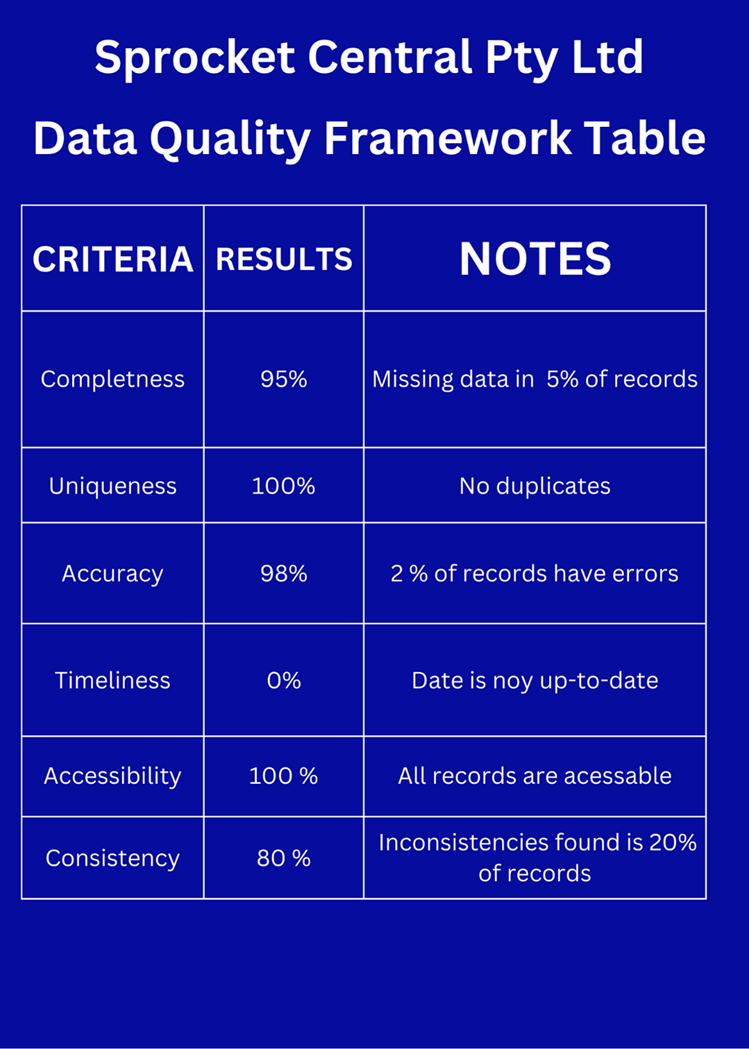


__Data Inconsistencies__

It appears that there are additional customer IDs present in the "Transactions table" and "Customer 
Address table" but not in the "Customer Master (Customer Demographic)" table. To mitigate this issue, it 
is recommended to ensure that all tables being used are from the same period of time. Only the customers 
listed in the "Customer Master" table should be used as the training set for the model to avoid any 
skewing of the analysis results due to missing data records. It is also suggested to refer to the excel file 
"data_outliers.xlsx" for a list of any discrepancies or outliers found between the tables.
>>
__INCONSISTENT DATA TYPES__
Inconsistent data types for the same attribute can cause confusion and inaccuracies when interpreting 
results. This occurs when some records have numeric values for a field, while others have string values. 
To mitigate this issue, it is recommended to convert selected records with character values to numeric 
and remove any non-numeric characters from string values. 
Additionally, it is recommended to put constraints on data types in the fact tables in the database to ensure 
consistency in future data input. This will help to improve the accuracy and interpretability of the results.
Going forward, the team will proceed with cleaning, standardizing, and transforming the data for the 
purpose of analyzing the model.
Any questions or assumptions that arise during this process will be 
documented. Once this is completed, it would be beneficial to consult with Sprocket Central's data subject 
matter expert to confirm that all assumptions align with their understanding.
Kind Regards

## Task 2
Data Insights

Targeting high value customers based on customer demographics and attributes.

### Steps in Data Exploration and Preprocessing

- Identification of variables and data types
- Analyzing the basic metrics
- Missing value treatment
- Non-Graphical Univariate Analysis
- Graphical Univariate Analysis
- Bivariate Analysis
- Variable transformations
- Missing value treatment
- Outlier treatment

In [10]:
Transactions.dtypes

0
transaction_id             object
product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

In [11]:
CustomerDemographic.dtypes

0
customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                 object
dtype: object

In [12]:
# Changing the dtypes to the supposed dtypes

In [13]:
intVar=[
"transaction_id","product_id","customer_id","product_first_sold_date"]
floatVar=["list_price","standard_cost"]
Bolean=["online_order"]
datetime=["transaction_date"]

In [14]:


def convert_object_to_int(df):
    for col in intVar:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    for col in floatVar:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    for col in Bolean:
        df[col] = df[col].astype(bool)
    for col in datetime:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
    return df



In [15]:
convert_object_to_int(Transactions)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [16]:
intVar=[
"past_3_years_bike_related_purchases","customer_id","tenure"]
#floatVar=["list_price","standard_cost"]
#Bolean=["DOB"]
datetime=["DOB"]

def convert_object_to_int(df):
    for col in intVar:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    #for col in floatVar:
        #df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    #for col in Bolean:
        #df[col] = df[col].astype(bool)
    for col in datetime:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
    return df

convert_object_to_int(CustomerDemographic)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,3413,Zulema,Cristofolo,Female,93,1997-10-15,VP Accounting,Financial Services,Mass Customer,N,ð¾ ð ð ð ð ð ð ð§,No,3
2,702,Zorina,Bosomworth,Female,72,1960-02-09,Help Desk Technician,NaN,Mass Customer,N,(ï½¡â â âï½¡),No,8
3,1754,Zonnya,Tolland,Female,24,1965-11-27,NaN,Retail,Mass Customer,N,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,15
4,2188,Zonnya,Fayter,Female,85,1972-04-03,Nurse Practicioner,NaN,Mass Customer,N,() { 0; }; touch /tmp/blns.shellshock1.fail;,No,17
5,2677,Zollie,Exell,Male,34,1954-10-08,NaN,Financial Services,Mass Customer,N,/dev/null; touch /tmp/blns.fail ; echo,No,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3409,Abbey,Nellen,Female,75,1977-04-29,Desktop Support Technician,Argiculture,Mass Customer,N,-1,No,16
3997,57,Abba,Masedon,M,87,1988-06-13,Chief Design Engineer,NaN,Mass Customer,N,100,Yes,13
3998,508,Abagail,Tordiffe,Female,94,1971-01-18,Project Manager,Property,Mass Customer,N,é¨è½æ ¼,Yes,11
3999,164,Aarika,Van Vuuren,Female,55,1999-08-07,Senior Editor,Retail,Affluent Customer,N,NIL,Yes,1


### Analyzing the basic metrics

In [17]:
Transactions.describe(include="all")

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,20000,20000,19803,19803,19803,19803,20000.000000,19803.000000,20000.000000
unique,NaN,NaN,NaN,364,2,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,10189,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,37823.508750
std,5773.647028,30.75359,1011.951046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,4734.747044
min,1.000000,0.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,0.000000
25%,5000.750000,18.00000,857.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35560.000000


In [18]:
CustomerAddress.describe(include="all")


,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [19]:
CustomerDemographic.describe(include="all")

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000.000000,4000,3875,4000,4000.000000,3913,3494,3344,4000,4000,3698.0,4000,4000.000000
unique,NaN,3139,3725,6,NaN,3448,195,9,3,2,90.0,2,NaN
top,NaN,Max,Ramsdell,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes,NaN
freq,NaN,5,3,2037,NaN,7,45,799,2000,3998,113.0,2024,NaN
first,NaN,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,NaN,48.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.425250
std,1154.844867,NaN,NaN,NaN,28.715005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.810108
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1000.750000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


### - Missing value treatment

In [20]:
Transactions.isna().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date      0
dtype: int64

In [21]:
Transactions["product_class"].mode

<bound method Series.mode of 1        medium
2        medium
3           low
4        medium
5        medium
          ...  
19996      high
19997    medium
19998    medium
19999      high
20000    medium
Name: product_class, Length: 20000, dtype: object>

In [22]:
Transactions["standard_cost"]=Transactions["standard_cost"].fillna(Transactions["standard_cost"].mean())

In [23]:
# fillling missing values with the mode
Transactions["product_class"]=Transactions["product_class"].fillna(Transactions["product_class"].mode())



In [24]:
Transactions["product_size"]=Transactions["product_size"].fillna(Transactions["product_size"].mode())
Transactions["product_line"]=Transactions["product_line"].fillna(Transactions["product_line"].mode())

In [25]:
Transactions["product_size"].mode()

0    medium
Name: product_size, dtype: object

In [26]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [27]:
CustomerDemographic.head()
# let drop default

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,3413,Zulema,Cristofolo,Female,93,1997-10-15,VP Accounting,Financial Services,Mass Customer,N,ð¾ ð ð ð ð ð ð ð§,No,3
2,702,Zorina,Bosomworth,Female,72,1960-02-09,Help Desk Technician,NaN,Mass Customer,N,(ï½¡â â âï½¡),No,8
3,1754,Zonnya,Tolland,Female,24,1965-11-27,NaN,Retail,Mass Customer,N,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,15
4,2188,Zonnya,Fayter,Female,85,1972-04-03,Nurse Practicioner,NaN,Mass Customer,N,() { 0; }; touch /tmp/blns.shellshock1.fail;,No,17
5,2677,Zollie,Exell,Male,34,1954-10-08,NaN,Financial Services,Mass Customer,N,/dev/null; touch /tmp/blns.fail ; echo,No,10


In [28]:
CustomerDemographic=CustomerDemographic.drop('default', axis=1)

In [29]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int32         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int32         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [30]:
# Filling the catogories varuable with the mode
CustomerDemographic["job_title"]=CustomerDemographic["job_title"].fillna(CustomerDemographic["job_title"].mode())
CustomerDemographic["job_industry_category"]=CustomerDemographic["job_industry_category"].fillna(CustomerDemographic["job_title"].mode())

In [31]:
CustomerDemographic["gender"].replace(to_replace = ["U","Femal","F"], value = "Female",inplace=True) 

In [32]:
CustomerDemographic["gender"].replace(to_replace = "M", value = "Male",inplace=True)

In [33]:
CustomerDemographic["gender"].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

### Size of the dataset:

In [34]:
Transactions.shape,CustomerAddress.shape,CustomerDemographic.shape

((20000, 13), (3999, 6), (4000, 12))

### Statistical Summary of  Variables:

### Non-Graphical Univariate Analysis:

In [35]:
CustomerAddress.describe(include="all")

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [36]:
CustomerDemographic.describe(include="all")

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
count,4000.000000,4000,3875,4000,4000.000000,3913,3494,3344,4000,4000,4000,4000.000000
unique,NaN,3139,3725,2,NaN,3448,195,9,3,2,2,NaN
top,NaN,Max,Ramsdell,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN
freq,NaN,5,3,2127,NaN,7,45,799,2000,3998,2024,NaN
first,NaN,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,NaN,48.890000,NaN,NaN,NaN,NaN,NaN,NaN,10.425250
std,1154.844867,NaN,NaN,NaN,28.715005,NaN,NaN,NaN,NaN,NaN,NaN,5.810108
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1000.750000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


In [37]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


### Univarite Analysis

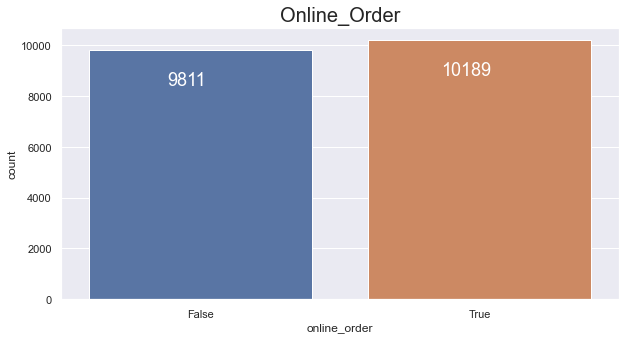

In [38]:
### Univarite Analysis
#Uniuvariate Analysis

# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='online_order', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Online_Order",size=20)
plt.show()


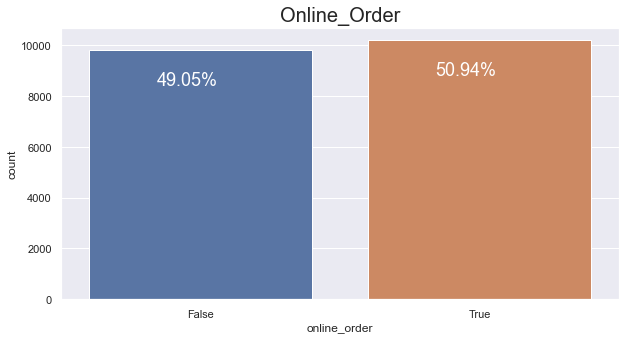

In [39]:
## 
sns.set(rc={'figure.figsize':(10,5)})

total = len(Transactions)
ax = sns.countplot(x='online_order', data = Transactions)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'\n{height/total*100:.2f}%', (p.get_x()+0.35, height), ha='center', va='top', color='white', size=18)
    
plt.title("Online_Order",size=20)
plt.show()


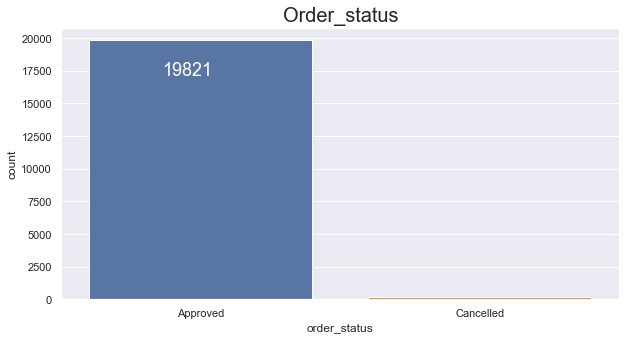

In [40]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='order_status', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Order_status",size=20)
plt.show()

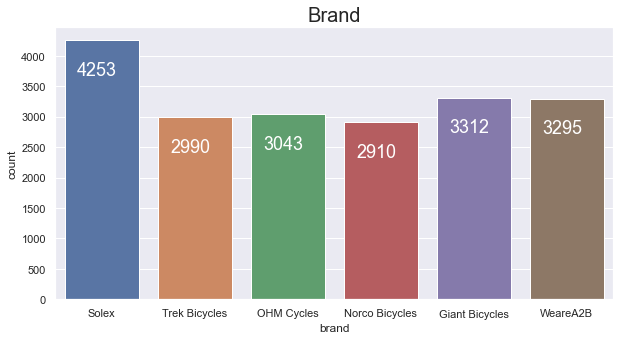

In [41]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='brand', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Brand",size=20)
plt.show()

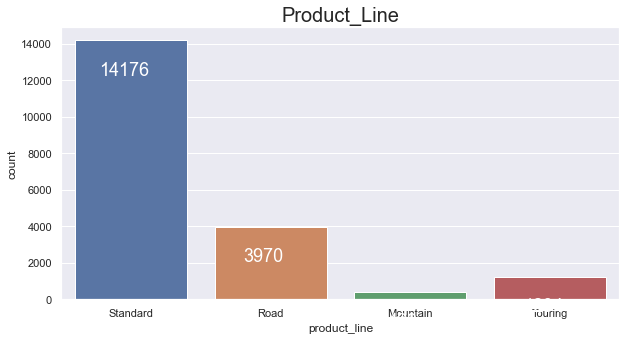

In [42]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='product_line', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Product_Line",size=20)
plt.show()

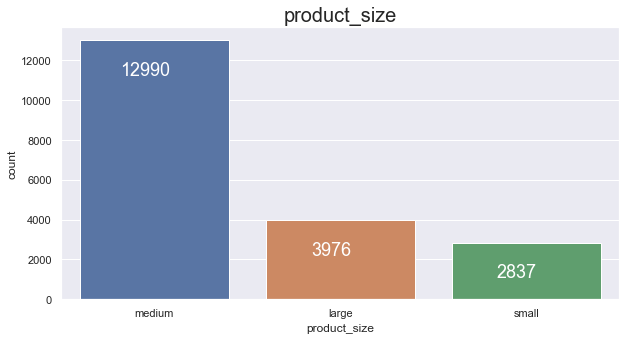

In [43]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='product_size', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("product_size",size=20)
plt.show()

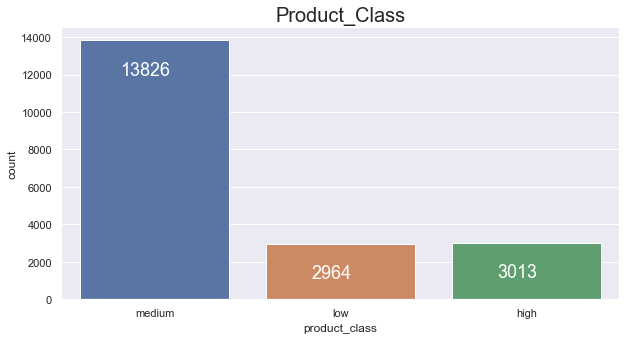

In [44]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='product_class', data = Transactions)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Product_Class",size=20)
plt.show()

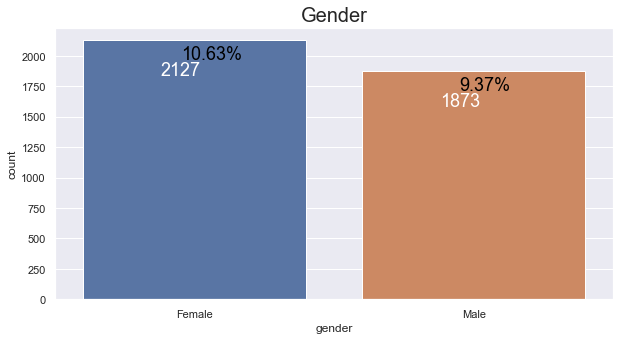

In [45]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='gender', data = CustomerDemographic)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)

total=len(Transactions)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'\n{height/total*100:.2f}%', (p.get_x()+0.35, height), ha='left', va='center_baseline', color='black', size=18)
    

plt.title("Gender",size=20)
plt.show()

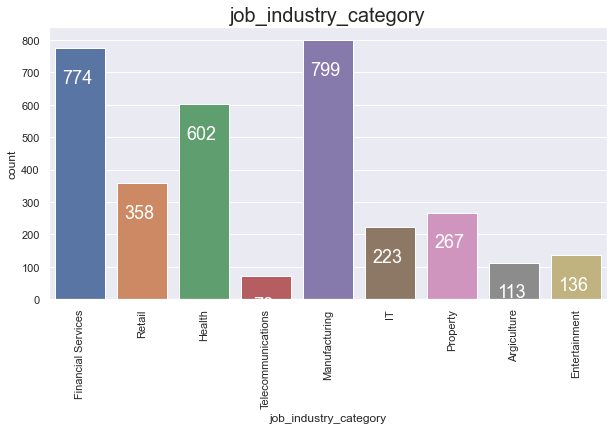

In [46]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='job_industry_category', data = CustomerDemographic)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("job_industry_category",size=20)
plt.xticks(rotation=90)
plt.show()

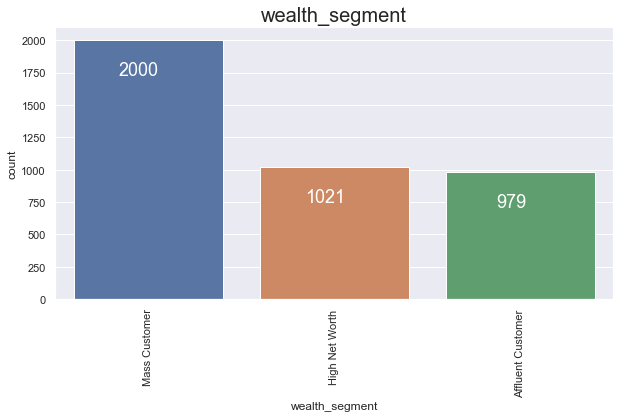

In [47]:
# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x='wealth_segment', data = CustomerDemographic)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("wealth_segment",size=20)
plt.xticks(rotation=90)
plt.show()

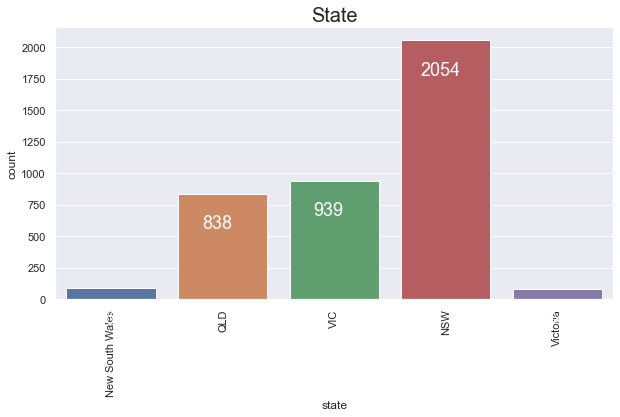

In [48]:

# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x= 'state', data = CustomerAddress)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("State",size=20)
plt.xticks(rotation=90)
plt.show()

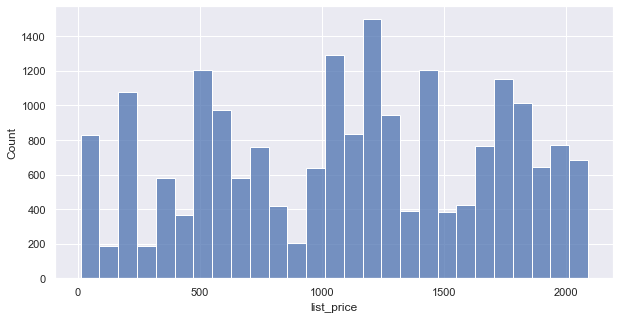

In [49]:
sns.set(rc={'figure.figsize':(10,5)})

sns.histplot(x= 'list_price', data = Transactions)

    


plt.show()

<AxesSubplot: >

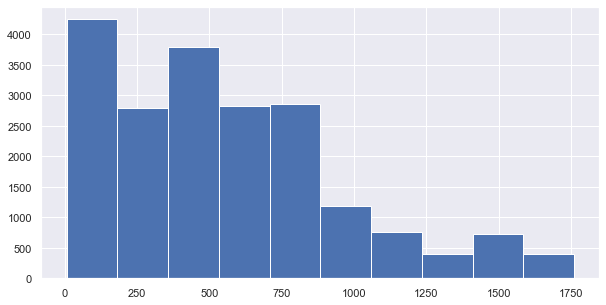

In [50]:
Transactions['standard_cost'].hist(bins=10)

### Bivariate Analysis

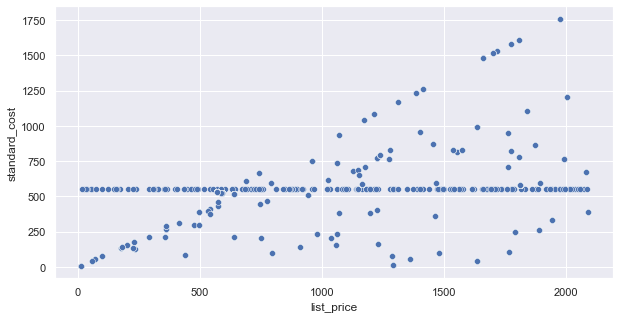

In [51]:
sns.set(rc={'figure.figsize':(10,5)})

sns.scatterplot(x= 'list_price', y="standard_cost",data =Transactions)

    


plt.show()

### Variable transformations

In [52]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [53]:
## Merging the datasets to give 
dateset=Transactions.merge(CustomerAddress,on="customer_id")
data=dateset.merge(CustomerDemographic,on="customer_id")

In [54]:
data["age"] = data["transaction_date"].dt.year - data["DOB"].dt.year 

In [55]:
data


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,62.0
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,62.0
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,62.0
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,38.0
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19854,68,130,2017-02-02,True,Approved,OHM Cycles,Standard,medium,medium,...,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1,20.0
19964,17966,17,2789,2017-12-06,False,Approved,Solex,Standard,high,medium,...,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7,25.0
19965,18462,80,2789,2017-06-20,False,Approved,OHM Cycles,Touring,low,medium,...,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7,25.0
19966,17981,69,3446,2017-12-26,True,Approved,Giant Bicycles,Road,medium,medium,...,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14,50.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int32         
 1   product_id                           19968 non-null  int32         
 2   customer_id                          19968 non-null  object        
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  bool          
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [57]:
data.corr()

,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,age
0,,,,,,,,,
transaction_id,1.000000,-0.011741,0.004373,-0.005744,-0.002759,-0.005759,-0.001370,0.004022,-0.005638
product_id,-0.011741,1.000000,-0.003433,0.089925,0.038473,0.084705,0.001602,-0.007284,-0.006849
online_order,0.004373,-0.003433,1.000000,0.000708,0.008211,0.006787,0.004009,0.010105,-0.003066
list_price,-0.005744,0.089925,0.000708,1.000000,0.548830,0.039121,0.006786,-0.008813,-0.000122
standard_cost,-0.002759,0.038473,0.008211,0.548830,1.000000,0.018618,-0.008669,-0.014150,0.003785
product_first_sold_date,-0.005759,0.084705,0.006787,0.039121,0.018618,1.000000,0.010109,0.009054,0.004143
past_3_years_bike_related_purchases,-0.001370,0.001602,0.004009,0.006786,-0.008669,0.010109,1.000000,-0.010124,-0.038657
tenure,0.004022,-0.007284,0.010105,-0.008813,-0.014150,0.009054,-0.010124,1.000000,0.439450
age,-0.005638,-0.006849,-0.003066,-0.000122,0.003785,0.004143,-0.038657,0.439450,1.000000


In [58]:
data['age'].fillna((data['age'].mean()), inplace=True)




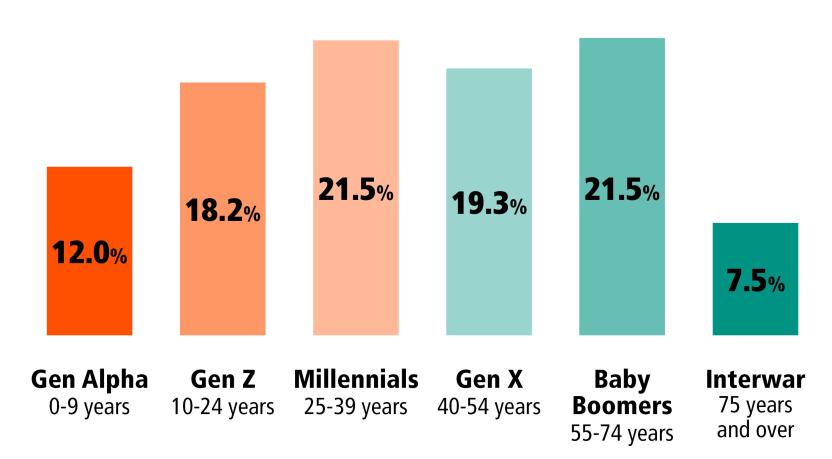



In [59]:
def life_stage(age):
    if age <= 24:
        return 'GenZ(0-24)'
    elif age <= 39:
        return 'Millennials(25-39)'
    elif age <=54:
        return "Gen X(40-54)"
    elif age <= 74:
        return 'Baby Boomers(55-74)'
    else:
        return 'Interwar(75-above)'
data["Age_group"]= data['age'].apply(life_stage)

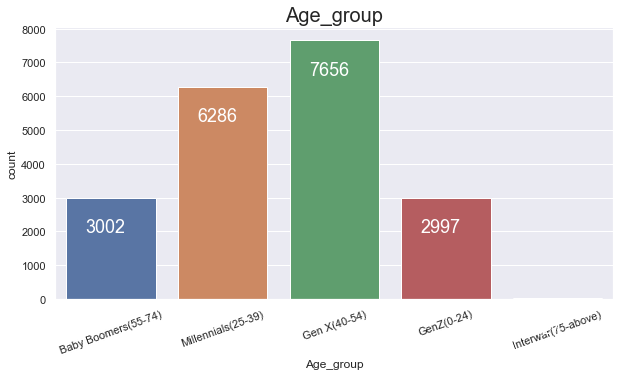

In [60]:

# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.countplot(x= 'Age_group', data = data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    

plt.title("Age_group",size=20)
plt.xticks(rotation=20)
plt.show()

def need_bike(postcode):
    # Define the geographic remoteness of different postcodes
    remoteness = {
        "10000": "urban",
        "20000": "suburban",
        "30000": "rural"
    }
    
    # Determine if the customer is in an urban, suburban, or rural area
    area = remoteness.get(postcode, "unknown")
    
    # Check if the customer needs a bike based on their geographic location
    if area == "urban":
        return False
    elif area == "suburban":
        return True
    elif area == "rural":
        return True
    else:
        return "Unknown postcode"


data["postcode"].unique()

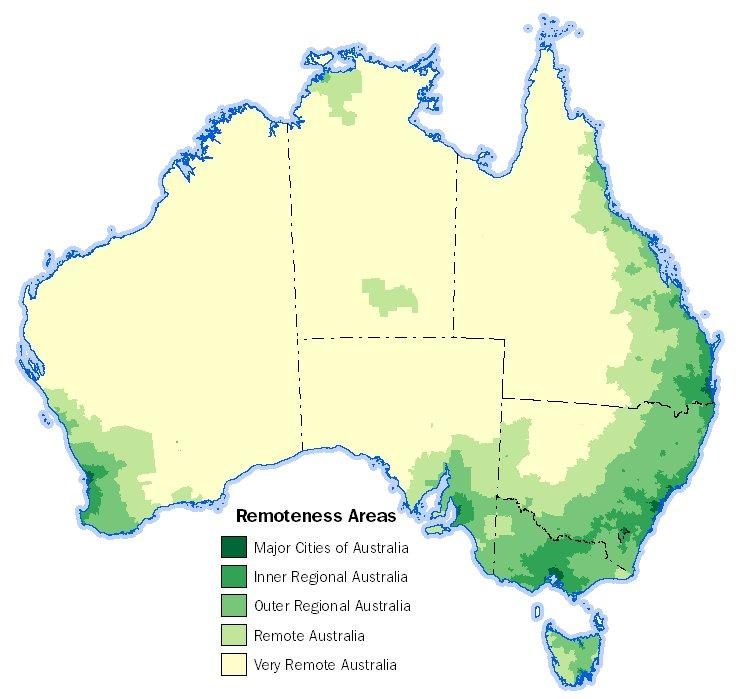


In [61]:
data["order_status"].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [62]:
data["postcode"].nunique()

835

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int32         
 1   product_id                           19968 non-null  int32         
 2   customer_id                          19968 non-null  object        
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  bool          
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [64]:
df=data.copy()


# Calculate the margin for each product
df['Value'] = df['list_price'] - df['standard_cost']

# Flag products with high margins
df['High_margin_product'] = (df['Value'] >= df['Value'].mean()).astype(int)


df["online_order"] = df["online_order"].map({True: 1, False: 0})
df['customer_id'] = df['customer_id'].astype(float)

df['order_status'] = df['order_status'].map({'Approved': 1, 'Cancelled': 0})




# convert date column to datetime format
df['Date']= pd.to_datetime(data['transaction_date'])
# keep only the most recent date of purchase
df['Rank'] = df.sort_values(['customer_id',"Value"]).groupby(['customer_id'])['Value'].rank(method='max').astype(int)


In [65]:



# dropping the address, postcode, sand country columns etc
df = df.drop(columns=['address', 'postcode', 'transaction_id', 'country','product_id','DOB','transaction_date',"transaction_date",'first_name', 'last_name',"product_first_sold_date","deceased_indicator",])


df_rec = df.copy()

In [66]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

In [67]:
freq = df_rec.groupby('customer_id')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['customer_id','frequency']
rec_freq = df_freq.merge(df_rec,on='customer_id')
rec_freq.head()

,customer_id,frequency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,wealth_segment,owns_car,tenure,age,Age_group,Value,High_margin_product,Date,Rank,recency
0,1.0,11,0,1,OHM Cycles,Standard,medium,medium,235.63,125.07,...,Mass Customer,Yes,11,64.0,Baby Boomers(55-74),110.56,0,2017-12-23,6,356
1,1.0,11,1,1,Solex,Standard,medium,medium,1577.53,826.51,...,Mass Customer,Yes,11,64.0,Baby Boomers(55-74),751.02,1,2017-04-06,11,95
2,1.0,11,1,1,Trek Bicycles,Road,low,small,1720.70,1531.42,...,Mass Customer,Yes,11,64.0,Baby Boomers(55-74),189.28,0,2017-05-11,7,130
3,1.0,11,0,1,Norco Bicycles,Standard,medium,medium,360.40,270.30,...,Mass Customer,Yes,11,64.0,Baby Boomers(55-74),90.10,0,2017-01-05,5,4
4,1.0,11,0,1,Solex,Standard,medium,medium,71.49,53.62,...,Mass Customer,Yes,11,64.0,Baby Boomers(55-74),17.87,0,2017-02-21,1,51


In [68]:
df=rec_freq.copy()

In [69]:

# check which columns are object type
obj_cols = df.columns[df.dtypes == 'object']

# apply label encoding to object type columns
for col in obj_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# check the data after encoding
print(df.head())

   customer_id  frequency  online_order  order_status  brand  product_line  \
0          1.0         11             0             1      2             2   
1          1.0         11             1             1      3             2   
2          1.0         11             1             1      4             1   
3          1.0         11             0             1      1             2   
4          1.0         11             0             1      3             2   

   product_class  product_size  list_price  standard_cost  ...  \
0              2             1      235.63         125.07  ...   
1              2             1     1577.53         826.51  ...   
2              1             2     1720.70        1531.42  ...   
3              2             1      360.40         270.30  ...   
4              2             1       71.49          53.62  ...   

   wealth_segment  owns_car  tenure   age  Age_group   Value  \
0               2         1      11  64.0          0  110.56   
1     

In [70]:
df.columns

Index(['customer_id', 'frequency', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'state', 'property_valuation', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'Age_group', 'Value', 'High_margin_product', 'Date', 'Rank', 'recency'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  float64       
 1   frequency                            19968 non-null  int64         
 2   online_order                         19968 non-null  int64         
 3   order_status                         19968 non-null  int64         
 4   brand                                19968 non-null  int8          
 5   product_line                         19968 non-null  int8          
 6   product_class                        19968 non-null  int8          
 7   product_size                         19968 non-null  int8          
 8   list_price                           19968 non-null  float64       
 9   standard_cost                        19968 non-null  float64       
 10  state     

In [72]:
df = df.drop(columns="Date")

In [73]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df =df
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]


In [74]:
new_df

,customer_id,frequency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,job_industry_category,wealth_segment,owns_car,tenure,age,Age_group,Value,High_margin_product,Rank,recency
0,1.0,11,0,1,2,2,2,1,235.63,125.07,...,3,2,1,11,64.0,0,110.56,0,6,356
2,1.0,11,1,1,4,1,1,2,1720.70,1531.42,...,3,2,1,11,64.0,0,189.28,0,7,130
3,1.0,11,0,1,1,2,2,1,360.40,270.30,...,3,2,1,11,64.0,0,90.10,0,5,4
4,1.0,11,0,1,3,2,2,1,71.49,53.62,...,3,2,1,11,64.0,0,17.87,0,1,51
5,1.0,11,0,1,0,1,2,1,1538.99,829.65,...,3,2,1,11,64.0,0,709.34,1,10,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500.0,6,1,1,0,1,2,1,792.90,594.68,...,1,0,0,17,50.0,1,198.22,0,4,8
19964,3500.0,6,0,1,5,2,2,1,1228.07,400.91,...,1,0,0,17,50.0,1,827.16,1,6,46
19965,3500.0,6,0,1,0,2,2,2,1311.44,1167.18,...,1,0,0,17,50.0,1,144.26,0,3,219
19966,3500.0,6,0,1,5,2,2,1,60.34,45.26,...,1,0,0,17,50.0,1,15.08,0,1,10


In [75]:
bb=['tenure','property_valuation','age','Rank','gender','Value','state','past_3_years_bike_related_purchases']

In [76]:
finaldf=new_df[bb]


In [77]:
#freq = finaldf.groupby('customer_id')['tenure','property_valuation','age','rank','recency','margin'].mean()

In [78]:
#finaldf=freq.reset_index()

finaldf

In [79]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19366 entries, 0 to 19967
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tenure                               19366 non-null  int32  
 1   property_valuation                   19366 non-null  int8   
 2   age                                  19366 non-null  float64
 3   Rank                                 19366 non-null  int32  
 4   gender                               19366 non-null  int8   
 5   Value                                19366 non-null  float64
 6   state                                19366 non-null  int8   
 7   past_3_years_bike_related_purchases  19366 non-null  int32  
dtypes: float64(2), int32(3), int8(3)
memory usage: 737.6 KB


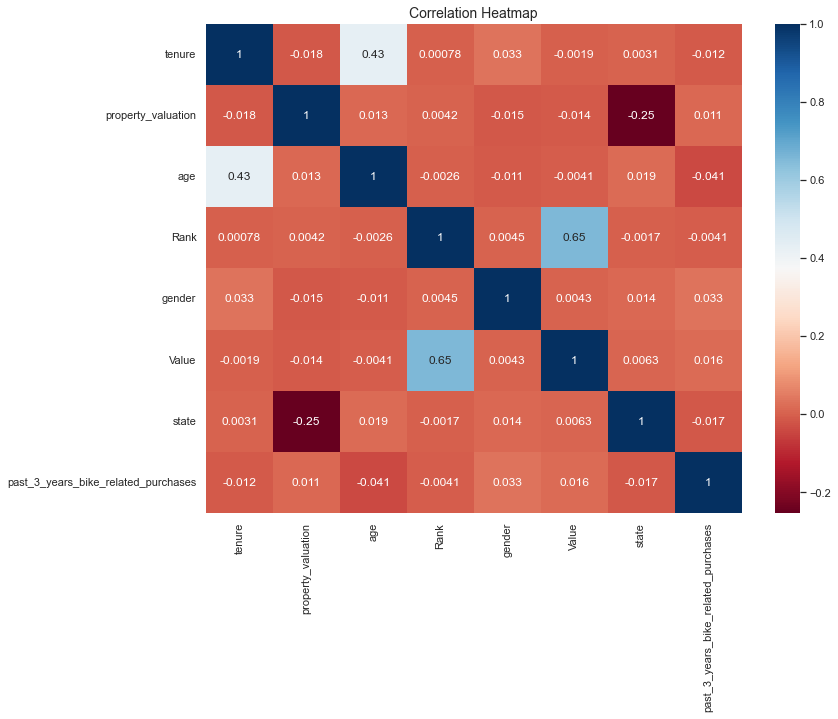

In [80]:
plt.figure(figsize=(12,9))
sns.heatmap(finaldf.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()


In [81]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['tenure','property_valuation','age','Rank','gender','Value','state','past_3_years_bike_related_purchases']
features = finaldf [col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

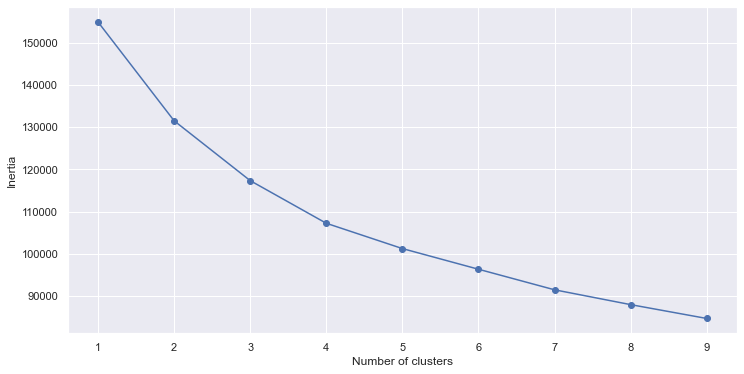

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [83]:
# First, build a model with 3 clusters
kmeans = KMeans( n_clusters = 3, init='k-means++',random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [84]:
labels=kmeans.predict(scaled_features)

In [85]:
score = silhouette_score(scaled_features, labels)
print("Silhouette score: ", score)

Silhouette score:  0.13632279582950116


In [86]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.13632279582950116


In [87]:
df_segm_kmeans= scaled_features.copy()
scaled_features["Segment K-means"] = kmeans.labels_

In [88]:
scaled_features

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases,Segment K-means
0,0.097142,0.877536,1.950029,0.989555,-0.953275,-0.888366,-0.172721,1.542779,1
1,0.097142,0.877536,1.950029,1.438091,-0.953275,-0.727590,-0.172721,1.542779,1
2,0.097142,0.877536,1.950029,0.541018,-0.953275,-0.930153,-0.172721,1.542779,1
3,0.097142,0.877536,1.950029,-1.253127,-0.953275,-1.077673,-0.172721,1.542779,1
4,0.097142,0.877536,1.950029,2.783701,-0.953275,0.334566,-0.172721,1.542779,2
...,...,...,...,...,...,...,...,...,...
19361,1.126932,0.877536,0.821549,0.092482,-0.953275,-0.709331,-0.917690,0.773551,1
19362,1.126932,0.877536,0.821549,0.989555,-0.953275,0.575199,-0.917690,0.773551,2
19363,1.126932,0.877536,0.821549,-0.356054,-0.953275,-0.819538,-0.917690,0.773551,1
19364,1.126932,0.877536,0.821549,-1.253127,-0.953275,-1.083372,-0.917690,0.773551,1


In [89]:
df_segm_analysis = scaled_features.groupby(['Segment K-means']).mean()

df_segm_analysis

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases
Segment K-means,,,,,,,,
0,-1.064497,-0.004608,-1.041526,-0.296320,-0.022313,-0.338198,-0.003826,0.008829
1,0.522115,0.012906,0.510233,-0.554244,0.005141,-0.590281,0.003076,-0.011349
2,0.176081,-0.015012,0.173192,1.085592,0.012290,1.176351,-0.001144,0.008940


In [90]:
scaled_features.shape

(19366, 9)

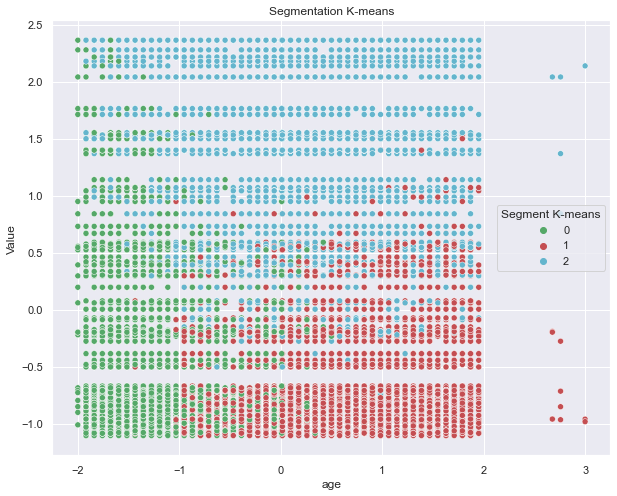

In [91]:
x_axis = scaled_features['age']
y_axis = scaled_features['Value']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = scaled_features['Segment K-means'], palette = ['g', 'r','c'])
plt.title('Segmentation K-means')
plt.show()

In [92]:
#PCA with K-Means for Better Visualization

In [93]:
df_std= scaled_features[['tenure','property_valuation','age','Rank','gender','Value','state','past_3_years_bike_related_purchases']]

pca = PCA()
pca.fit(df_std) 

PCA()

In [94]:
pca.explained_variance_ratio_


array([0.20682404, 0.17936071, 0.15687156, 0.12945576, 0.12018378,
       0.09364329, 0.07050828, 0.04315258])

Text(0, 0.5, 'Cumulative Explained Variance')

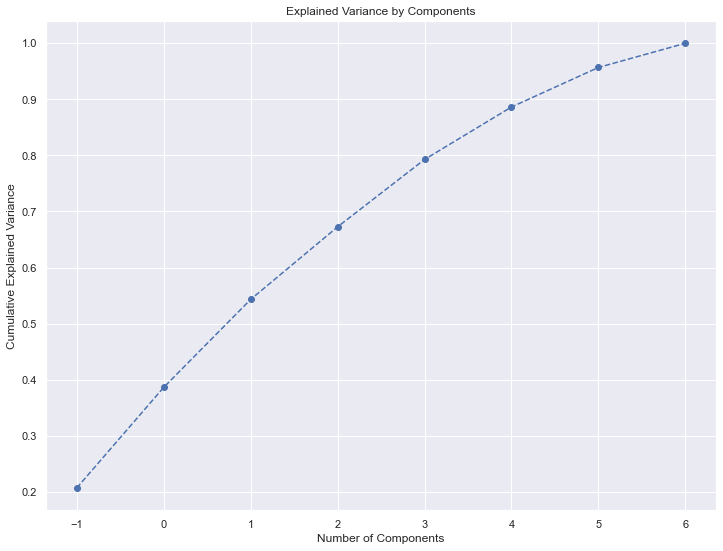

In [95]:
plt.figure(figsize = (12,9))
plt.plot(range(-1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [96]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[-0.01033942, -0.01397417, -0.01502536,  0.7065277 ,  0.01050225,
         0.70702842,  0.00976508,  0.01399379],
       [ 0.70093131, -0.05150982,  0.70159386,  0.01365807,  0.03232094,
         0.01076655,  0.07004154, -0.08692052],
       [-0.0563417 , -0.70261159, -0.0742773 , -0.02250978,  0.06814424,
        -0.00344001,  0.69982697, -0.05220624]])

In [97]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_std.columns,
              index = ['Component 1', 'Component 2', 'Component 3',])
df_pca_comp

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases
Component 1,-0.010339,-0.013974,-0.015025,0.706528,0.010502,0.707028,0.009765,0.013994
Component 2,0.700931,-0.051510,0.701594,0.013658,0.032321,0.010767,0.070042,-0.086921
Component 3,-0.056342,-0.702612,-0.074277,-0.022510,0.068144,-0.003440,0.699827,-0.052206


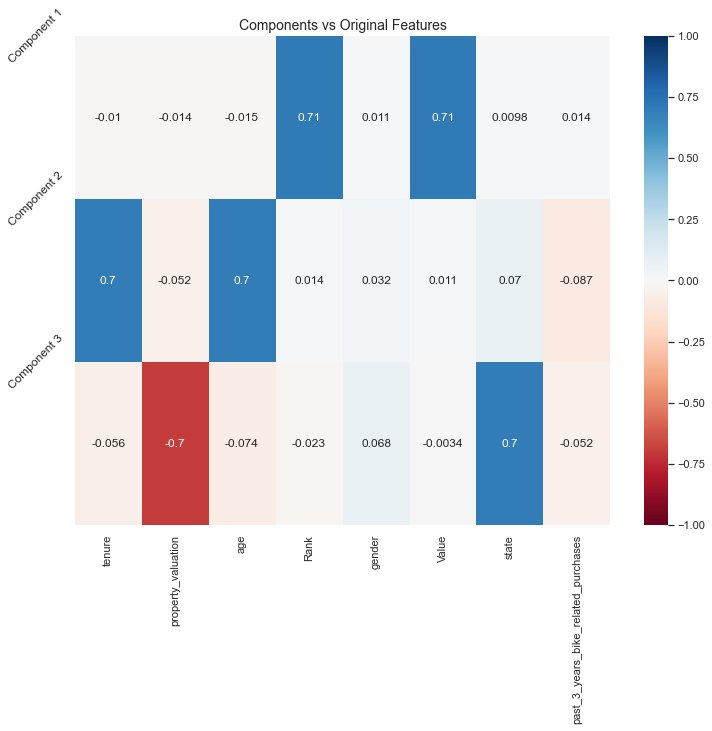

In [98]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [99]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)
scores_pca

array([[ 0.03837213,  1.2179596 , -1.05247954],
       [ 0.46894846,  1.22581674, -1.06312907],
       [-0.30807584,  1.21138355, -1.04223934],
       ...,
       [-0.87540548,  1.14508268, -1.47781774],
       [-1.69575026,  1.12998982, -1.45671724],
       [ 0.39233873,  1.16698849, -1.50109503]])

Text(0, 0.5, 'Inertia')

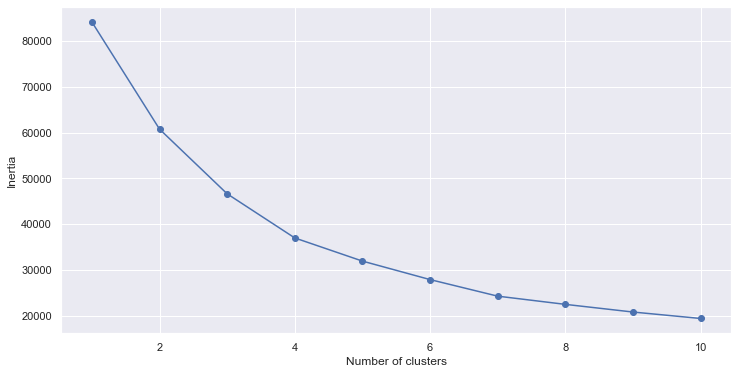

In [100]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'wcss':wcss})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['wcss'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [101]:
kmeans_pca = KMeans(n_clusters = 3
                    , init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [102]:
scores_pca.shape

(19366, 3)

In [103]:
print(silhouette_score(scores_pca, kmeans_pca.labels_, metric='euclidean'))

0.27582083665206764


In [104]:
df_segm_pca_kmeans = pd.concat([new_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,customer_id,frequency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,age,Age_group,Value,High_margin_product,Rank,recency,Component 1,Component 2,Component 3,Segment K-means PCA
0,1.0,11,0,1,2,2,2,1,235.63,125.07,...,64.0,0,110.56,0,6,356,0.038372,1.217960,-1.052480,0
1,1.0,11,1,1,4,1,1,2,1720.70,1531.42,...,64.0,0,189.28,0,7,130,0.468948,1.225817,-1.063129,0
2,1.0,11,0,1,1,2,2,1,360.40,270.30,...,64.0,0,90.10,0,5,4,-0.308076,1.211384,-1.042239,0
3,1.0,11,0,1,3,2,2,1,71.49,53.62,...,64.0,0,17.87,0,1,51,-1.679991,1.185291,-1.001346,0
4,1.0,11,0,1,0,1,2,1,1538.99,829.65,...,64.0,0,709.34,1,10,138,2.170634,1.255631,-1.097072,1


In [105]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,customer_id,frequency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,tenure,age,Age_group,Value,High_margin_product,Rank,recency,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,1728.361098,6.288689,0.516801,1.0,2.243729,1.710128,1.440251,1.110506,853.863874,597.035599,...,13.472196,46.203384,1.522953,256.828275,0.117842,2.547444,181.048628,-0.825582,0.716924,-0.053861
1,1732.239199,7.242334,0.502091,1.0,3.123693,2.036585,1.757491,0.623171,1577.576443,460.749190,...,11.487805,42.004172,1.922125,1116.827253,0.920035,6.228571,182.055401,1.592383,0.279018,-0.043896
2,1775.454967,6.406842,0.508118,1.0,2.331658,1.749324,1.475841,1.031697,981.580818,598.244399,...,4.301894,26.923675,2.676073,383.336419,0.258601,3.128721,181.765945,-0.417947,-1.480674,0.136683


In [106]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','gender']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                1:'career focused',
                                2:'fewer opportunities'
                             
                                                          
                              })
df_segm_pca_kmeans_freq

,customer_id,frequency,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,Age_group,Value,High_margin_product,Rank,recency,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
standard,1728.361098,6.288689,0.516801,1.0,2.243729,1.710128,1.440251,1.110506,853.863874,597.035599,...,1.522953,256.828275,0.117842,2.547444,181.048628,-0.825582,0.716924,-0.053861,8452,0.436435
career focused,1732.239199,7.242334,0.502091,1.0,3.123693,2.036585,1.757491,0.623171,1577.576443,460.749190,...,1.922125,1116.827253,0.920035,6.228571,182.055401,1.592383,0.279018,-0.043896,5740,0.296396
fewer opportunities,1775.454967,6.406842,0.508118,1.0,2.331658,1.749324,1.475841,1.031697,981.580818,598.244399,...,2.676073,383.336419,0.258601,3.128721,181.765945,-0.417947,-1.480674,0.136683,5174,0.267169


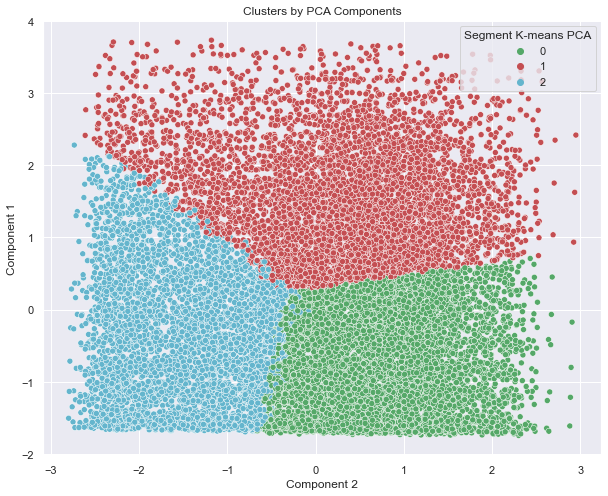

In [107]:

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

In [108]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19366 entries, 0 to 19365
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tenure                               19366 non-null  float64
 1   property_valuation                   19366 non-null  float64
 2   age                                  19366 non-null  float64
 3   Rank                                 19366 non-null  float64
 4   gender                               19366 non-null  float64
 5   Value                                19366 non-null  float64
 6   state                                19366 non-null  float64
 7   past_3_years_bike_related_purchases  19366 non-null  float64
 8   Segment K-means                      19366 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.3 MB


In [109]:
# Data Cleaning amd Transformation of the new customer Data

In [110]:
scaled_features.columns

Index(['tenure', 'property_valuation', 'age', 'Rank', 'gender', 'Value',
       'state', 'past_3_years_bike_related_purchases', 'Segment K-means'],
      dtype='object')

In [111]:
CustDf=NewCustomerList[['tenure', 'property_valuation',  'Rank', 'gender', 'Value',
       'state', 'past_3_years_bike_related_purchases',"DOB"]]

In [112]:

floatVar=["Rank","Value","past_3_years_bike_related_purchases","tenure","property_valuation"]
def convert_object_to_int(df):
    for col in floatVar:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    

In [113]:
convert_object_to_int(CustDf)

In [114]:
CustDf['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [115]:
CustDf['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [116]:
CustDf["gender"].replace(to_replace = ["U"], value = "Female",inplace=True) 

In [117]:
from datetime import datetime
# Date of birth in the format (year, month, day)
current_date = (2018, 1, 1)

# Convert the date of birth to a datetime object
dob = datetime(*current_date)

In [118]:
dob.year

2018

In [119]:
# Assuming the current Date is 2018
CustDf["age"] =dob.year - data["DOB"].dt.year 

CustDf["age"].fillna((CustDf["age"].mean()), inplace=True)


In [120]:

# check which columns are object type
obj_cols = CustDf.columns[CustDf.dtypes == 'object']

# apply label encoding to object type columns
for col in obj_cols:
    CustDf[col] = CustDf[col].astype('category')
    CustDf[col] = CustDf[col].cat.codes

# check the data after encoding
print(CustDf.head())

0  tenure  property_valuation  Rank  gender  Value  state  \
1      14                   6     1       1      1      1   
2      16                  11     1       1      1      0   
3      10                   5     1       0      1      2   
4       5                   1     4       0      1      1   
5      19                   9     4       0      1      0   

0  past_3_years_bike_related_purchases  DOB   age  
1                                   86  236  63.0  
2                                   69  453  63.0  
3                                   10  541  39.0  
4                                   64  648  39.0  
5                                   34  374  39.0  


In [121]:
CustDf

,tenure,property_valuation,Rank,gender,Value,state,past_3_years_bike_related_purchases,DOB,age
1,14,6,1,1,1,1,86,236,63.0
2,16,11,1,1,1,0,69,453,63.0
3,10,5,1,0,1,2,10,541,39.0
4,5,1,4,0,1,1,64,648,39.0
5,19,9,4,0,1,0,34,374,39.0
...,...,...,...,...,...,...,...,...,...
996,9,7,996,1,0,0,60,273,52.0
997,6,10,997,1,0,0,22,953,52.0
998,15,2,997,0,0,1,17,184,52.0
999,19,2,997,1,0,1,30,159,18.0


In [122]:
CustDf=CustDf[['tenure', 'property_valuation', 'age', 'Rank', 'gender', 'Value',
       'state', 'past_3_years_bike_related_purchases']]

In [123]:
CustDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tenure                               1000 non-null   int32  
 1   property_valuation                   1000 non-null   int32  
 2   age                                  1000 non-null   float64
 3   Rank                                 1000 non-null   int32  
 4   gender                               1000 non-null   int8   
 5   Value                                1000 non-null   int32  
 6   state                                1000 non-null   int8   
 7   past_3_years_bike_related_purchases  1000 non-null   int32  
dtypes: float64(1), int32(5), int8(2)
memory usage: 29.4 KB


In [124]:
from sklearn.preprocessing import StandardScaler
new_cust = CustDf.drop_duplicates()
col_names = ['tenure', 'property_valuation', 'age', 'Rank', 'gender', 'Value',
       'state', 'past_3_years_bike_related_purchases']
custfeatures = new_cust[col_names]
scaler = StandardScaler().fit(custfeatures.values)
custfeatures = scaler.transform(custfeatures.values)
cust_scaled_features = pd.DataFrame(custfeatures, columns = col_names)

In [125]:
scores_pc_cust = pca.transform(cust_scaled_features)
scores_pc_cust

array([[-0.20980468,  1.53001503,  0.43596982],
       [-0.25936709,  1.68537539, -1.65648347],
       [-0.2142232 , -0.15631747,  1.71843776],
       ...,
       [ 0.70395458,  1.27584961,  1.43488994],
       [ 0.7659269 , -0.13218214,  1.71280788],
       [ 0.7496056 , -1.12312428, -0.8919585 ]])

In [126]:
new_label=kmeans_pca.predict(scores_pc_cust)

In [127]:
new_label

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,

In [128]:
print(silhouette_score(cust_scaled_features, new_label, metric='euclidean'))

0.0524759012135279


In [129]:
# Analyze and interpret the segmentation results
unique, counts = np.unique(new_label, return_counts=True)
print("Segment distribution: ", dict(zip(unique, counts)))

# Calculate average values for each feature for each segment
segment_0 = new_label[new_label == 0]
segment_0_avg = segment_0.mean()

segment_1 = new_label[new_label == 1]
segment_1_avg = segment_1.mean()

segment_1 = new_label[new_label == 2]
segment_2_avg = segment_1.mean()

print(segment_0_avg)
print(segment_1_avg)
print(segment_2_avg)



Segment distribution:  {0: 467, 1: 147, 2: 386}
0.0
1.0
2.0


In [130]:
cust_kmeans = cust_scaled_features.copy()
cust_kmeans['K-means'] = new_label
cust_kmeans.head()

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases,K-means
0,0.518807,-0.506632,1.721107,-1.724547,1.061913,1.415275,0.283949,1.301669,0
1,0.916056,1.306654,1.721107,-1.724547,1.061913,1.415275,-0.899172,0.689780,0
2,-0.275691,-0.869289,-0.280058,-1.724547,-0.941697,1.415275,1.467070,-1.433838,0
3,-1.268813,-2.319918,-0.280058,-1.714154,-0.941697,1.415275,0.283949,0.509812,2
4,1.511930,0.581340,-0.280058,-1.714154,-0.941697,1.415275,-0.899172,-0.569993,0


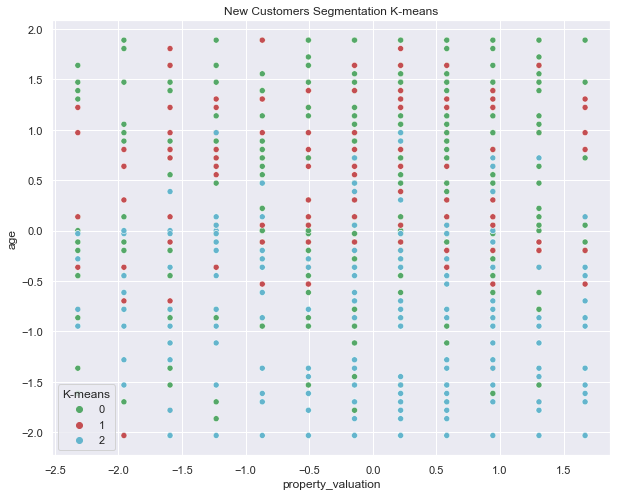

In [131]:
x_axis = cust_kmeans['property_valuation']
y_axis = cust_kmeans['age']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = cust_kmeans['K-means'], palette = ['g', 'r','c'])
plt.title('New Customers Segmentation K-means')
plt.show()

In [132]:
    df_cust= cust_scaled_features[['tenure', 'property_valuation', 'age', 'Rank', 'gender', 'Value',
       'state', 'past_3_years_bike_related_purchases']]

pca_cut = PCA(n_components = 3)
pca_cut.fit(df_cust) 

PCA(n_components=3)

In [133]:
pca_cut.explained_variance_ratio_


array([0.22755845, 0.15789959, 0.13232001])

In [134]:
df_pca_cust = pd.DataFrame(data = pca_cut.components_,
                           columns = df_cust.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_cust

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases
Component 1,-0.054391,-0.017834,0.015668,-0.704276,-0.017816,0.706635,-0.027017,0.009671
Component 2,0.090543,-0.690324,-0.048139,-0.013954,-0.103771,0.002066,0.704382,-0.076268
Component 3,0.562983,0.110637,0.537980,-0.022370,-0.091404,0.017672,-0.007187,-0.610057


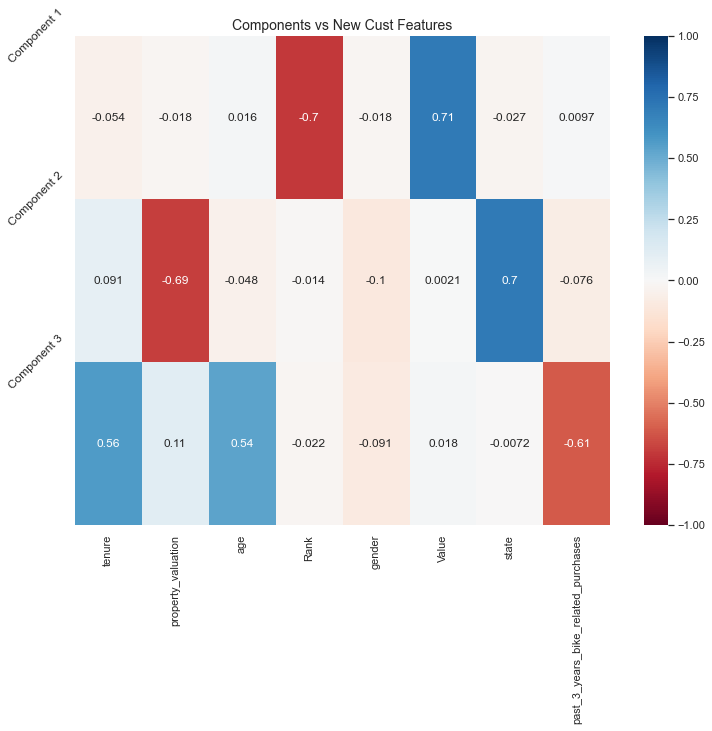

In [135]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_cust,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs New Cust Features',fontsize = 14)
plt.show()

In [136]:
scores_cust = pca_cut.transform(df_cust)

In [137]:
scores_cust

array([[ 2.20842023,  0.33138618,  0.33234075],
       [ 2.18052287, -1.67110163,  1.13839137],
       [ 2.20402338,  1.85605287,  0.61179156],
       ...,
       [-1.70857555,  1.73973045,  1.37379873],
       [-1.82737821,  1.70453719, -0.1726691 ],
       [-1.78493924, -1.04272684, -1.01355684]])

In [138]:
new_label1=kmeans_pca.predict(scores_cust)

In [139]:
df_new_cust= pd.concat([CustDf.reset_index(drop = True), pd.DataFrame(scores_cust)], axis = 1)
df_new_cust.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_new_cust['New_label'] =new_label1
df_new_cust.head()

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases,Component 1,Component 2,Component 3,New_label
0,14,6,63.0,1,1,1,1,86,2.208420,0.331386,0.332341,1
1,16,11,63.0,1,1,1,0,69,2.180523,-1.671102,1.138391,1
2,10,5,39.0,1,0,1,2,10,2.204023,1.856053,0.611792,1
3,5,1,39.0,4,0,1,1,64,2.327353,1.785784,-1.285278,1
4,19,9,39.0,4,0,1,0,34,2.145888,-0.716261,1.268463,1


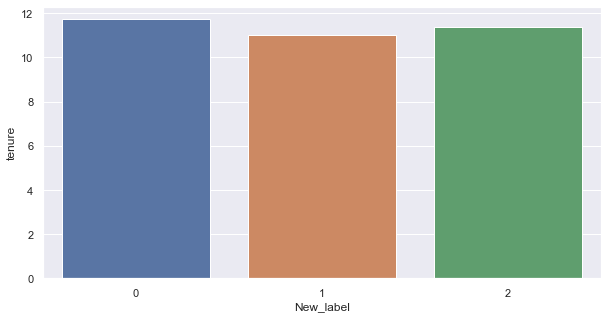

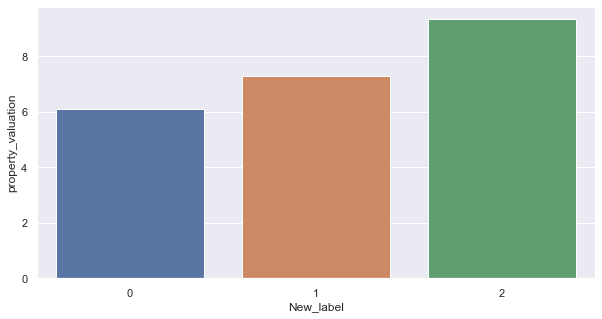

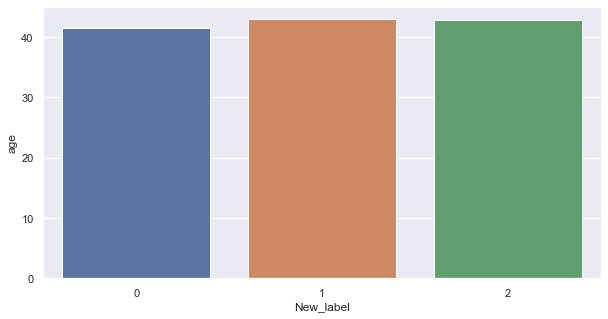

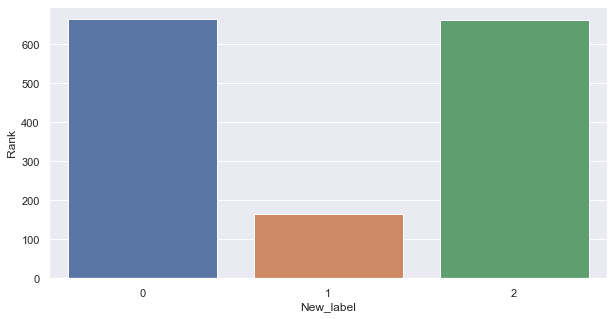

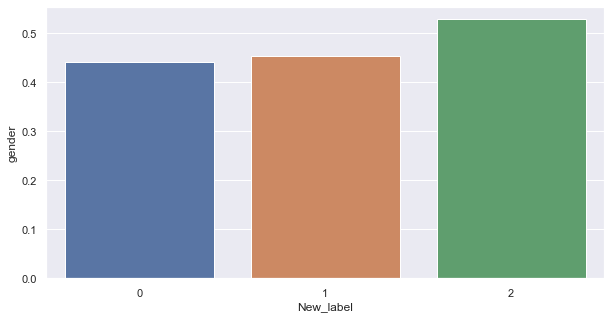

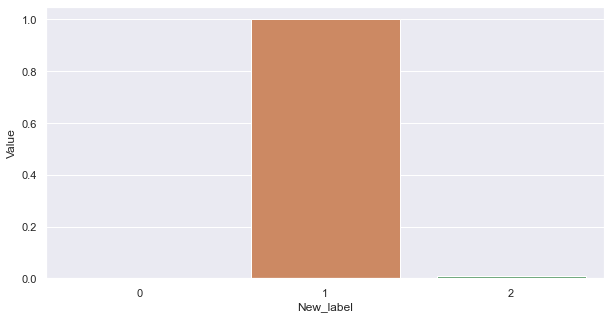

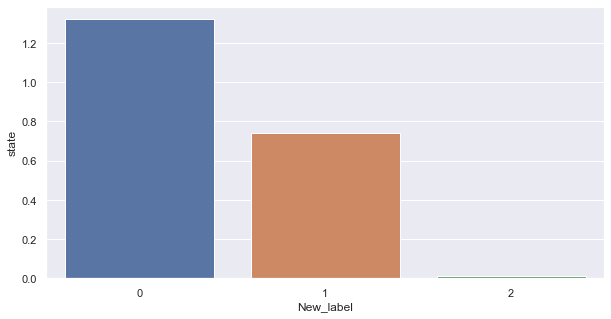

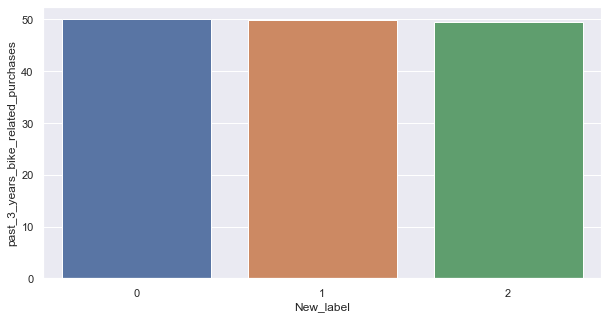

In [140]:
avg_df = df_new_cust.groupby(['New_label'], as_index=False).mean()
total=len(df_new_cust)
list1= df_new_cust.columns[:-4]
for i in list1:
    sns.barplot(x='New_label',y=str(i),data=avg_df)
    
    plt.show()

In [141]:
# We calculate the means by segments.
df_new_cust_freq = df_new_cust.groupby(['New_label']).mean()
df_new_cust_freq

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases,Component 1,Component 2,Component 3
New_label,,,,,,,,,,,
0,11.713918,6.082474,41.486778,664.144330,0.440722,0.000000,1.319588,50.007732,-0.915586,0.800962,-0.083878
1,11.006061,7.296970,42.938769,164.103030,0.454545,1.000000,0.739394,49.893939,1.823469,0.020831,0.031978
2,11.386525,9.322695,42.879703,663.039007,0.528369,0.010638,0.014184,49.531915,-0.874105,-1.126409,0.077985


In [142]:
cust_kmeans = cust_scaled_features.copy()
cust_kmeans['K-means'] = new_label1
cust_kmeans.head()

,tenure,property_valuation,age,Rank,gender,Value,state,past_3_years_bike_related_purchases,K-means
0,0.518807,-0.506632,1.721107,-1.724547,1.061913,1.415275,0.283949,1.301669,1
1,0.916056,1.306654,1.721107,-1.724547,1.061913,1.415275,-0.899172,0.689780,1
2,-0.275691,-0.869289,-0.280058,-1.724547,-0.941697,1.415275,1.467070,-1.433838,1
3,-1.268813,-2.319918,-0.280058,-1.714154,-0.941697,1.415275,0.283949,0.509812,1
4,1.511930,0.581340,-0.280058,-1.714154,-0.941697,1.415275,-0.899172,-0.569993,1


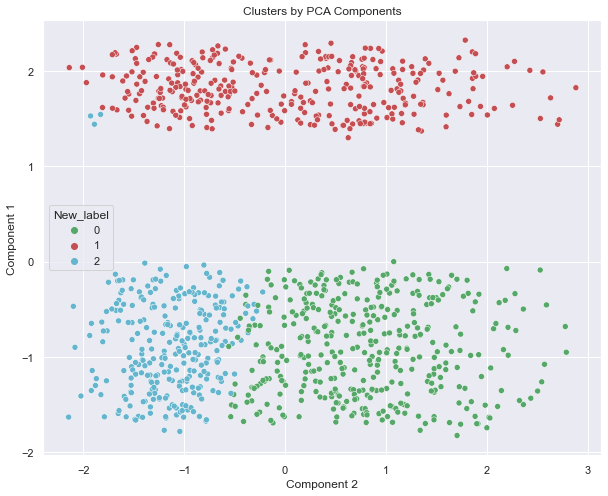

In [143]:

x_axis = df_new_cust['Component 2']
y_axis = df_new_cust['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_new_cust["New_label"], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()